In [3]:
import pandas as pd
import datetime
import string
pd.set_option('max_colwidth',80000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def first_preprocessing_csv(url_link):
    speech = pd.read_csv(url_link)
    # concat the columns for the content of the speechs
    concat_cols= []
    # now the speeches are separated at numerous columns, concatenate all the relevant columns to get the full content

    for i in range(1,211):
        concat_cols.append('content'+str(i))

    cols=concat_cols
    speech['full_content'] = speech[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
    
    speech['full_content']  = speech['full_content'].str.replace('[^\w\s]','')
    
    # only keep the columns we need
    need_columns = ['date', 'speaker', 'title', 'title of the speaker', 'topic', 'situation1',
                    'situation2', 'full_content'
                    ]

    speech = pd.DataFrame(speech, columns=need_columns)
    # drop the speeches whose content is nan
    speech = speech[~speech.full_content.str.contains(
        'nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan') == True]

    # take care of date information and sort the csv file by the date
    speech['date']=pd.to_datetime(speech['date'],errors='coerce')
    speech = speech[speech['date'].notnull()]
    speech['month']=pd.to_datetime(speech['date']).dt.month
    speech['year']=pd.to_datetime(speech['date']).dt.year
    speech=speech.sort_values(by=['year','month'],ascending=False)


    return speech

url = '/Users/ypi/Downloads/all_ECB_speeches.csv'
get_speech=first_preprocessing_csv(url)

get_speech.head()


date  speaker  \
1 2020-12-16      NaN   
2 2020-12-16      NaN   
4 2020-12-14      NaN   
5 2020-12-14      NaN   
6 2020-11-27      NaN   

                                                                title  \
1               The importance of trust for the ECB’s monetary policy   
2  Keeping cyber risk at bay: our individual and joint responsibility   
4                                                     Welcome address   
5                                       A commitment to the recovery    
6           From the payments revolution to the reinvention of money    

                        title of the speaker  \
1   Member of the Executive Board of the ECB   
2   Member of the Executive Board of the ECB   
4   Member of the Executive Board of the ECB   
5   Member of the Executive Board of the ECB   
6   Member of the Executive Board of the ECB   

                                                                                                                                                                                                                                                                      topic  \
1   as part of the seminar series “Havarie Europa. Zur Pathogenese europäischer Gegenwarten” at the Hamburg Institute for Social Research (Hamburger Institut für Sozialforschung)|  SPEECH The importance of trust for the ECB’s monetary policy Speech by Isabel Schnabel   
2                                                      at the fifth meeting of the Euro Cyber Resilience Board for pan-European Financial Infrastructures|  SPEECH Keeping cyber risk at bay: our individual and joint responsibility Introductory remarks by Fabio Panetta   
4                                                                                                                                                               at the third roundtable on euro risk-free rates|  SPEECH Welcome address Welcome address by Isabel Schnabel   
5                                                                                                                                                                         at the Rome Investment Forum 2020|  SPEECH  A commitment to the recovery  Speech by Fabio Panetta   
6                                                                                                   at the Deutsche Bundesbank conference on the “Future of Payments in Europe”|  SPEECH  From the payments revolution to the reinvention of money  Speech by Fabio Panetta   

                                  situation1  \
1   Member of the Executive Board of the ECB   
2   Member of the Executive Board of the ECB   
4   Member of the Executive Board of the ECB   
5   Member of the Executive Board of the ECB   
6   Member of the Executive Board of the ECB   

                                                                                                                                                                                          situation2  \
1   as part of the seminar series “Havarie Europa. Zur Pathogenese europäischer Gegenwarten” at the Hamburg Institute for Social Research (Hamburger Institut für Sozialforschung) Frankfurt am Main   
2                                                                               at the fifth meeting of the Euro Cyber Resilience Board for pan-European Financial Infrastructures Frankfurt am Main   
4                                                                                                                                  at the third roundtable on euro risk-free rates Frankfurt am Main   
5                                                                                                                                                             at the Rome Investment Forum 2020 Rome   
6                                                                                                      at the Deutsche Bundesbank conference on the “Future of Payments in Europe” Frankfurt am Main   

            

In [6]:
# I want to know who is delivering the speech
def get_first_insight(text,want_to_know):
    return text[want_to_know].value_counts()[:10]

print(get_first_insight(get_speech,'title of the speaker'))


 Member of the Executive Board of the ECB                                                       556
 President of the ECB                                                                           234
 Vice-President of the ECB                                                                      144
 President of the European Central Bank                                                         115
 Member of the Executive Board of the European Central Bank                                      74
 Vice-President of the European Central Bank                                                     48
 Member of the Executive Board of the ECB and Vice-Chair of the Supervisory Board of the ECB     47
 Mitglied des Direktoriums der EZB                                                               37
 Member of the Governing Council and of the Executive Board of the European Central Bank         21
 President of the ECB Brussels                                                                   14


In [7]:
import nltk
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from nltk.corpus import stopwords

# nltk.download('stopwords')
# nltk.download('punkt')
stop_word=stopwords.words('english')

#
def remove_substring(df,col,text):
    df[col]=df[col].apply(lambda sen:sen.replace(text,''))
    df[col]=df[col].apply(lambda sen:' '.join(x for x in sen.split()))
    return df

get_speech=remove_substring(get_speech,'full_content','nan')


In [11]:
## TO DO : ADD THE MOST OBVIOUSLY RELATED WORDS TO STOPWORDS E.G POLICY 

In [8]:

def remove_stop_words_token(df,text):
    stop_word=stopwords.words('english')
    df['without_stop_words']=df[text].apply(lambda sen:' '.join(x for x in sen.split() if x not in stop_word))
    df['tokenized']=df.apply(lambda row:nltk.word_tokenize(row['without_stop_words']),axis=1)
    return df

clean_speech=remove_stop_words_token(get_speech,'full_content')

print(clean_speech['tokenized'][10])



['ECB', 'Conference', 'Money', 'Markets', '23', 'November', '2020', 'Frankfurt', 'Main', '23', 'November', '2020', 'I', 'would', 'like', 'welcome', 'warmly', 'virtual', 'ECB', 'Conference', 'Money', 'Markets1', 'This', 'conference', 'offers', 'excellent', 'platform', 'facilitate', 'exchange', 'academic', 'experts', 'money', 'markets', 'policy', 'makers', 'The', 'conference', 'papers', 'address', 'topical', 'research', 'questions', 'respect', 'money', 'markets', 'thus', 'provide', 'valuable', 'input', 'implementation', 'monetary', 'policy', 'Money', 'markets', 'cornerstone', 'ficial', 'system2', 'Banks', 'nonbank', 'ficial', 'institutions3', 'nonficial', 'corporations', 'rely', 'money', 'markets', 'shortterm', 'funding', 'liquidity', 'management', 'collateral', 'needs', 'As', 'result', 'dislocations', 'money', 'markets', 'severely', 'undermine', 'stability', 'ficial', 'system', 'Due', 'central', 'role', 'source', 'shortterm', 'funding', 'money', 'markets', 'also', 'crucial', 'implementa

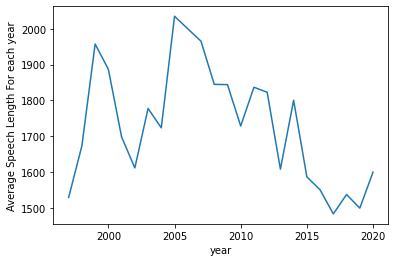

None


In [13]:
def nums_words(df,words):
    df['nums_words']= df[words].apply(lambda row:len(row))
    return df

clean_speech= nums_words(clean_speech,'tokenized')


import matplotlib.pyplot as plt

def graph(df,year,words):
    ax= df.groupby(year)[words].mean().plot()
    ax.set_ylabel('Average Speech Length For each year')

    plt.show()

print(graph(clean_speech,'year','nums_words'))




In [15]:
# count the most frequent

def count_the_most_frequent(df,text):
    freq=pd.Series(' '.join(df[text]).split()).value_counts()[:100]
    return freq

print(count_the_most_frequent(clean_speech,'without_stop_words'))





The              39324
euro             39074
ficial           33511
policy           31270
area             29690
monetary         26855
I                20883
In               20749
banks            19904
market           19580
also             18584
European         17094
economic         17029
ECB              16526
This             15767
stability        15601
central          14937
would            14903
countries        14752
de               14585
inflation        14378
growth           14360
price            13867
markets          13396
rates            10969
crisis           10501
rate             10463
bank              9777
der               9749
economy           9532
risk              9225
It                9190
die               9024
interest          8949
time              8699
new               8658
banking           8583
important         8472
may               8466
national          7938
level             7926
la                7898
one               7807
system     

In [16]:
# count the most frequent words for each year


from collections import Counter
year_freq= clean_speech.groupby('year')['without_stop_words'].apply(lambda x: Counter(" ".join(x).split()).most_common(30))
print(year_freq)

year
1997                             [(monetary, 462), (policy, 426), (The, 356), (ESCB, 298), (euro, 255), (I, 218), (price, 218), (stability, 217), (central, 201), (inflation, 201), (EMI, 186), (also, 165), (In, 158), (area, 156), (rate, 155), (market, 155), (exchange, 147), (ECB, 137), (rates, 133), (banks, 129), (EMU, 128), (countries, 128), (European, 124), (economic, 117), (Treaty, 117), (ficial, 112), (would, 109), (single, 108), (This, 107), (Stage, 102)]
1998                               [(euro, 1011), (monetary, 1003), (policy, 905), (The, 849), (area, 545), (der, 543), (price, 534), (stability, 525), (I, 485), (ESCB, 473), (die, 454), (European, 417), (Council, 413), (ECB, 399), (In, 388), (economic, 382), (also, 374), (de, 315), (rate, 313), (Governing, 312), (central, 298), (und, 289), (This, 275), (exchange, 273), (ficial, 271), (countries, 266), (national, 256), (would, 254), (des, 251), (market, 246)]
1999        [(euro, 3549), (de, 2328), (The, 2221), (monetary, 2116

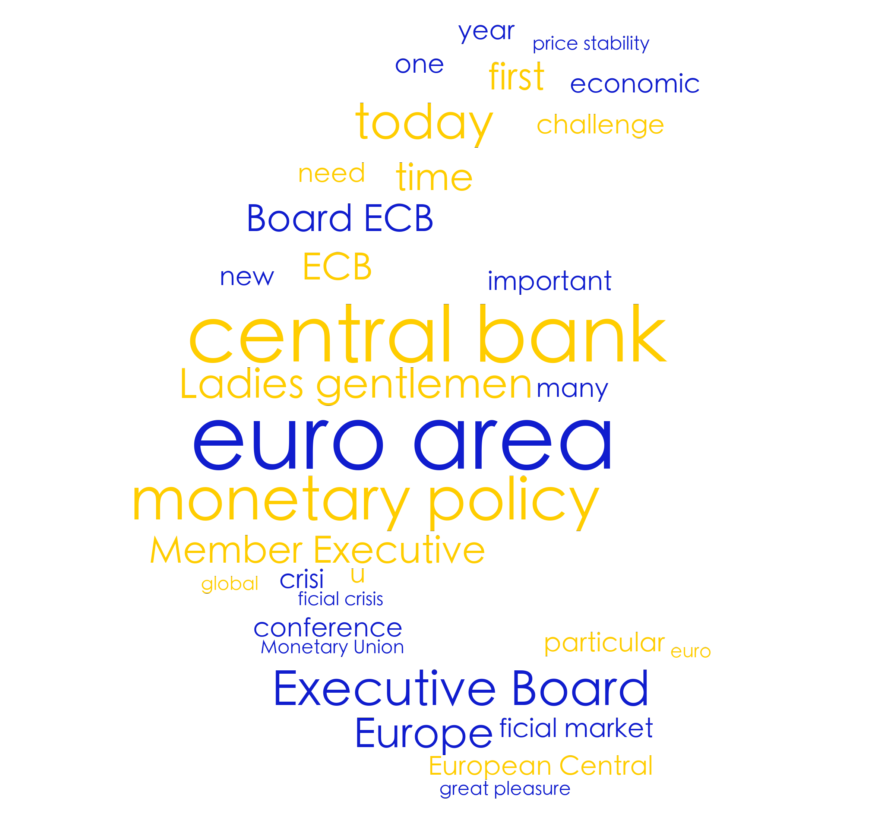

In [17]:
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import colors

mask = np.array(Image.open('/Users/ypi/Desktop/euro.png'))
color_list = ['#101DCE', '#ffcd00']  # 建立颜色数组
colormap = colors.ListedColormap(color_list)

wordcloud = word_cloud = WordCloud(

    background_color=None,
    mode="RGBA",
    prefer_horizontal=1,
    mask=mask,
    height=800,
    width=500,
    scale=10,
    colormap=colormap,  # 设置颜色
    margin=2
).generate(str(clean_speech['tokenized']))
plt.figure(figsize=[25, 15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



